In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from textblob import TextBlob

Data

In [3]:
Leads_basic_details = pd.read_csv("D:\ED_Tech_Analysis\Data\leads_basic_details.csv")
Leads_demo_watched_details = pd.read_csv("D:\ED_Tech_Analysis\Data\leads_demo_watched_details.csv")
Leads_interaction_details = pd.read_csv("D:\ED_Tech_Analysis\Data\leads_interaction_details.csv")
Leads_reasons_for_no_interest = pd.read_csv("D:\ED_Tech_Analysis\Data\leads_reasons_for_no_interest.csv")
Sales_managers_assigned_leads_details = pd.read_csv("D:\ED_Tech_Analysis\Data\sales_managers_assigned_leads_details.csv")

Leads Demography

In [44]:
Leads_basic_details

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals
...,...,...,...,...,...,...,...
355,USR1356,21,MALE,Mumbai,Degree,Government Employee,user_referrals
356,USR1357,22,MALE,Chennai,Looking for Job,Government Employee,website
357,USR1358,25,MALE,Chennai,B.Tech,Government Employee,SEO
358,USR1359,18,FEMALE,Mumbai,B.Tech,Government Employee,email_marketing


Checking Missing Values

In [45]:
Leads_basic_details.isna().sum()

lead_id              0
age                  0
gender               0
current_city         0
current_education    0
parent_occupation    0
lead_gen_source      0
dtype: int64

Analyzing Numerical Values

{'whiskers': [<matplotlib.lines.Line2D at 0x2a666eb78b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a666eb7e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a666eb75e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a666ea8430>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a666ea8700>],
 'means': []}

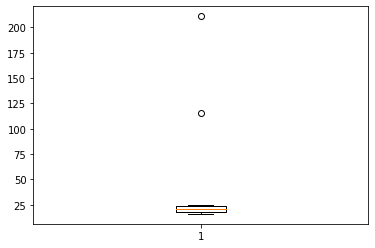

In [46]:
plt.boxplot(Leads_basic_details["age"])

Outlier is there so we have to drop it

In [47]:
Leads_basic_details.drop(Leads_basic_details[Leads_basic_details.age > 50].index,inplace=True)

In [48]:
Leads_basic_details.describe().age

count    358.000000
mean      20.768156
std        2.852959
min       16.000000
25%       18.000000
50%       21.000000
75%       24.000000
max       25.000000
Name: age, dtype: float64

In [49]:
bins = [15,19,22,25]
labels = ["16-19","20-22","23-25"]
Leads_basic_details["age_group"] = pd.cut(Leads_basic_details["age"],bins=bins,labels=labels)

In [50]:
Leads_basic_details.age_group.value_counts()

20-22    153
16-19    108
23-25     97
Name: age_group, dtype: int64

<AxesSubplot:>

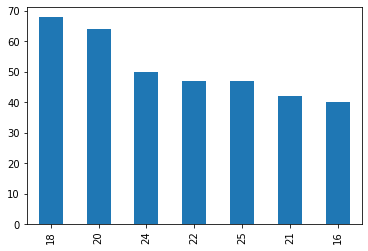

In [51]:
Leads_basic_details.age.value_counts().plot(kind = "bar")

In [52]:
px.histogram(Leads_basic_details,x = "age_group")

Analyzing Categorical Values

Gender

In [53]:
Leads_basic_details.gender.value_counts()

FEMALE    198
MALE      160
Name: gender, dtype: int64

<AxesSubplot:>

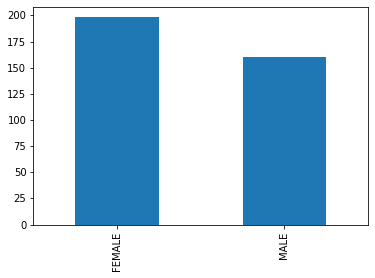

In [54]:
Leads_basic_details.gender.value_counts().plot(kind = "bar")

In [55]:
px.histogram(Leads_basic_details,x = "gender")

City

In [56]:
Leads_basic_details.current_city.value_counts()

Visakhapatnam    76
Hyderabad        75
Kochi            67
Bengaluru        51
Mumbai           48
Chennai          41
Name: current_city, dtype: int64

<AxesSubplot:>

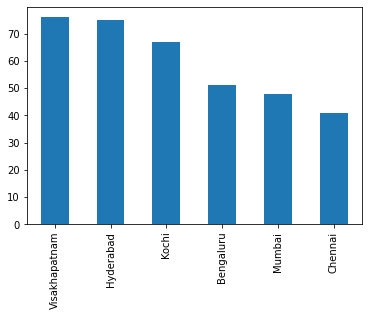

In [57]:
Leads_basic_details.current_city.value_counts().plot(kind = "bar")

Education Scenario

In [58]:
Leads_basic_details.current_education.value_counts()

B.Tech                    139
Looking for Job           117
Degree                     42
Intermediate               40
Intermediate Completed     12
10th Completed              8
Name: current_education, dtype: int64

<AxesSubplot:>

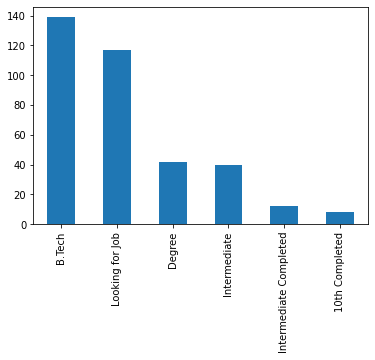

In [59]:
Leads_basic_details.current_education.value_counts().plot(kind = "bar")

Parent Occupation

In [60]:
Leads_basic_details.parent_occupation.value_counts()

Government Employee    128
Business                80
IT Employee             70
Lawyer                  44
Private Employee        14
Doctor                  11
Professor/Faculty       11
Name: parent_occupation, dtype: int64

<AxesSubplot:>

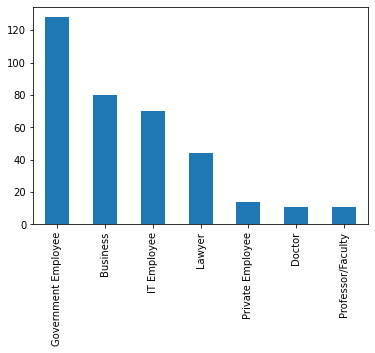

In [61]:
Leads_basic_details.parent_occupation.value_counts().plot(kind = "bar")

Lead Generation Medium

In [62]:
Leads_basic_details.lead_gen_source.value_counts()

social_media       85
SEO                75
email_marketing    73
user_referrals     66
website            59
Name: lead_gen_source, dtype: int64

<AxesSubplot:>

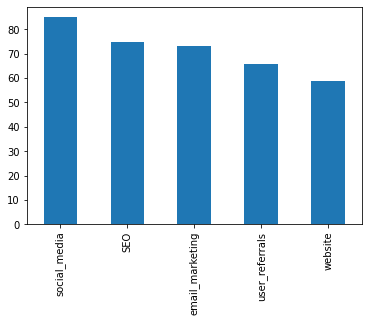

In [63]:
Leads_basic_details.lead_gen_source.value_counts().plot(kind = "bar")

Awarness Analysis

In [64]:
Awarness_data = pd.merge(Leads_basic_details,Leads_demo_watched_details,how='inner')

In [65]:
Awarness_data

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source,age_group,demo_watched_date,language,watched_percentage
0,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,20-22,1/4/2022,Telugu,42
1,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals,20-22,1/7/2022,Telugu,81
2,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals,16-19,1/2/2022,Telugu,35
3,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals,16-19,1/3/2022,Hindi,38
4,USR1006,16,MALE,Kochi,Intermediate,Doctor,user_referrals,16-19,1/12/2022,Hindi,54
...,...,...,...,...,...,...,...,...,...,...,...
188,USR1317,24,MALE,Mumbai,Looking for Job,Lawyer,social_media,23-25,2/25/2022,English,48
189,USR1318,21,MALE,Mumbai,Degree,IT Employee,email_marketing,20-22,2/25/2022,English,83
190,USR1319,22,FEMALE,Bengaluru,Looking for Job,Government Employee,email_marketing,20-22,2/28/2022,English,84
191,USR1343,24,FEMALE,Kochi,Looking for Job,IT Employee,social_media,23-25,1/25/2022,English,68


{'whiskers': [<matplotlib.lines.Line2D at 0x2a6671f2d40>,
 'caps': [<matplotlib.lines.Line2D at 0x2a6671f32e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a6671f2a70>],
 'medians': [<matplotlib.lines.Line2D at 0x2a6671f3880>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a6671f3b50>],
 'means': []}

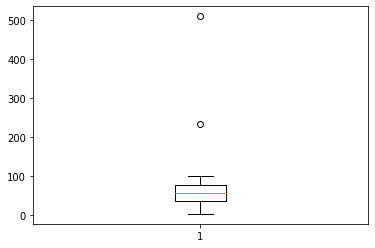

In [66]:
plt.boxplot(Awarness_data.watched_percentage)

In [67]:
Awarness_data.drop(Awarness_data[Awarness_data.watched_percentage > 150].index,inplace=True)

In [68]:
Awarness_data.describe()

,age,watched_percentage
count,191.000000,191.000000
mean,20.942408,53.424084
std,2.826907,25.879137
min,16.000000,2.000000
25%,18.000000,33.500000
50%,21.000000,55.000000
75%,24.000000,75.000000
max,25.000000,100.000000


Interaction Analysis

In [69]:
Leads_interaction_details.lead_stage.value_counts()

lead             1547
consideration     331
awareness         250
conversion         64
Name: lead_stage, dtype: int64

In [70]:
Leads_interaction_details.call_status.value_counts()

successful      1866
unsuccessful     326
Name: call_status, dtype: int64

In [71]:
Leads_interaction_details.call_reason.value_counts()

demo_not_attended             701
lead_introduction             499
demo_schedule                 347
post_demo_followup            197
followup_for_conversion       189
interested_for_conversion     142
successful_conversion          64
followup_for_consideration     53
Name: call_reason, dtype: int64

In [72]:
interaction_data = pd.merge(Awarness_data,Leads_interaction_details,how="inner")

In [73]:
interaction_data

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source,age_group,demo_watched_date,language,watched_percentage,jnr_sm_id,lead_stage,call_done_date,call_status,call_reason
0,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,20-22,1/4/2022,Telugu,42,JNR1001MG,lead,1/3/2022,successful,lead_introduction
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,20-22,1/4/2022,Telugu,42,JNR1001MG,lead,1/4/2022,successful,demo_schedule
2,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,20-22,1/4/2022,Telugu,42,JNR1001MG,awareness,1/5/2022,successful,post_demo_followup
3,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,20-22,1/4/2022,Telugu,42,JNR1001MG,awareness,1/6/2022,successful,followup_for_consideration
4,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,20-22,1/4/2022,Telugu,42,JNR1001MG,consideration,1/7/2022,successful,interested_for_conversion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,USR1348,16,FEMALE,Kochi,Intermediate,Business,social_media,16-19,2/27/2022,English,72,JNR1012MG,lead,2/28/2022,successful,demo_not_attended
1551,USR1348,16,FEMALE,Kochi,Intermediate,Business,social_media,16-19,2/27/2022,English,72,JNR1012MG,awareness,2/28/2022,successful,post_demo_followup
1552,USR1348,16,FEMALE,Kochi,Intermediate,Business,social_media,16-19,2/27/2022,English,72,JNR1012MG,awareness,2/28/2022,successful,followup_for_consideration
1553,USR1348,16,FEMALE,Kochi,Intermediate,Business,social_media,16-19,2/27/2022,English,72,JNR1012MG,consideration,2/28/2022,successful,followup_for_conversion


In [74]:
interaction_data.to_csv("D:\ED_Tech_Analysis\Data\interaction.csv")

PermissionError: [Errno 13] Permission denied: 'D:\\ED_Tech_Analysis\\Data\\interaction.csv'

In [ ]:
interaction_data.age_group.value_counts()

20-22    668
23-25    459
16-19    278
Name: age_group, dtype: int64

In [76]:
Leads_reasons_for_no_interest

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
0,USR1001,No time for student,NaN,NaN
1,USR1003,NaN,No time for student,NaN
2,USR1004,NaN,Wants offline classes,NaN
3,USR1005,NaN,Can't afford,NaN
4,USR1006,NaN,Student not interested in domain,NaN
...,...,...,...,...
289,USR1356,Cannot afford,NaN,NaN
290,USR1357,Cannot afford,NaN,NaN
291,USR1358,Wants offline classes,NaN,NaN
292,USR1359,Will join in final year,NaN,NaN


In [80]:
reasons_for_not_interested_in_demo = pd.DataFrame(Leads_reasons_for_no_interest.iloc[:,0:2])

In [83]:
reasons_for_not_interested_in_demo.isna().sum()

lead_id                                 0
reasons_for_not_interested_in_demo    130
dtype: int64

In [86]:
reasons_for_not_interested_in_demo = reasons_for_not_interested_in_demo.dropna()

In [90]:
reasons_for_not_interested_in_demo

,lead_id,reasons_for_not_interested_in_demo,sentiment
0,USR1001,No time for student,0.000
32,USR1048,Student not interested in domain,-0.125
33,USR1049,No time for student,0.000
35,USR1054,Wants offline classes,0.200
37,USR1056,Can't afford,0.000
...,...,...,...
289,USR1356,Cannot afford,0.000
290,USR1357,Cannot afford,0.000
291,USR1358,Wants offline classes,0.200
292,USR1359,Will join in final year,0.000


In [89]:
reasons_for_not_interested_in_demo["sentiment"] = reasons_for_not_interested_in_demo['reasons_for_not_interested_in_demo'].apply(lambda x: 'NaN' if pd.isnull(x) else TextBlob(x).sentiment.polarity)

C:\Users\rishi\AppData\Local\Temp\ipykernel_17400\401155761.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



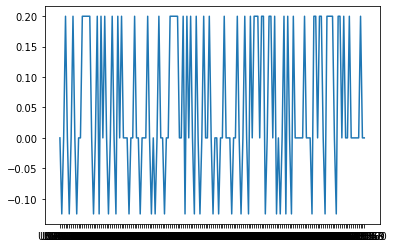

In [91]:
plt.plot(reasons_for_not_interested_in_demo["lead_id"],reasons_for_not_interested_in_demo["sentiment"])

In [98]:
import plotly.express as px
fig = px.line(reasons_for_not_interested_in_demo, y="sentiment", x="lead_id", markers=True)
fig.show()